In [19]:
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('preprocessed_data.csv',index_col=0)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,...,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886,1
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,...,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605,1
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,...,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661,1
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,...,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954,1
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,...,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082,1


In [21]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status'],
      dtype='object')

In [22]:
# Here, we attempt to fit a random forest classifier to our data

In [23]:
x = df.drop('status',axis=1)
y = df['status']

In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=34)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [26]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [27]:
ypred = rfc.predict(xtest)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.94      0.97        33

    accuracy                           0.95        39
   macro avg       0.88      0.97      0.91        39
weighted avg       0.96      0.95      0.95        39



In [29]:
# We might consider varying the number of decision tree that we use in our forest

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
results = []
for i in range(1,200):
    rfc = RandomForestClassifier(n_estimators=100)
    rfc.fit(xtrain,ytrain)
    ypred = rfc.predict(xtest)
    
    result = [i,accuracy_score(ypred,ytest)]
    results.append(result)
results

[[1, 0.9230769230769231],
 [2, 0.9230769230769231],
 [3, 0.9487179487179487],
 [4, 0.9487179487179487],
 [5, 0.9487179487179487],
 [6, 0.9230769230769231],
 [7, 0.9230769230769231],
 [8, 0.9230769230769231],
 [9, 0.9230769230769231],
 [10, 0.9487179487179487],
 [11, 0.9230769230769231],
 [12, 0.9230769230769231],
 [13, 0.9487179487179487],
 [14, 0.9487179487179487],
 [15, 0.9230769230769231],
 [16, 0.9487179487179487],
 [17, 0.9487179487179487],
 [18, 0.9230769230769231],
 [19, 0.9230769230769231],
 [20, 0.9230769230769231],
 [21, 0.9487179487179487],
 [22, 0.9230769230769231],
 [23, 0.9230769230769231],
 [24, 0.9487179487179487],
 [25, 0.9230769230769231],
 [26, 0.9230769230769231],
 [27, 0.9487179487179487],
 [28, 0.9230769230769231],
 [29, 0.8974358974358975],
 [30, 0.9230769230769231],
 [31, 0.9230769230769231],
 [32, 0.9230769230769231],
 [33, 0.9487179487179487],
 [34, 0.9230769230769231],
 [35, 0.9230769230769231],
 [36, 0.9230769230769231],
 [37, 0.9230769230769231],
 [38, 0.92

In [32]:
resultdf = pd.DataFrame(results)
resultdf.head()

,0,1
0,1,0.923077
1,2,0.923077
2,3,0.948718
3,4,0.948718
4,5,0.948718


In [33]:
resultdf.rename(columns={0:'Number of Trees',1:'Accuracy Score'},inplace=True)
resultdf.head()

,Number of Trees,Accuracy Score
0,1,0.923077
1,2,0.923077
2,3,0.948718
3,4,0.948718
4,5,0.948718


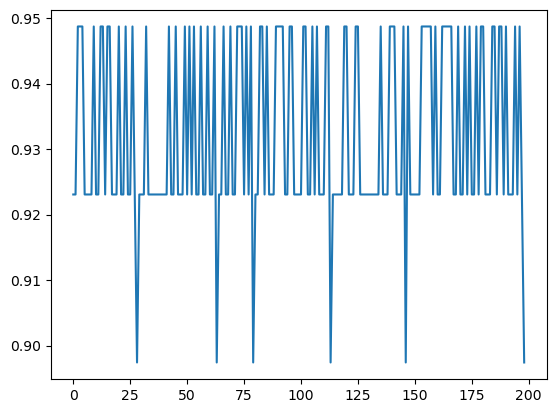

In [34]:
import matplotlib.pyplot as plt
plt.plot(resultdf['Accuracy Score'])

In [35]:
# the random forest model seems to give an accuracy of about 92% on average 